In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold


In [66]:
data = pd.read_csv('dataset.csv')
data

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,0,6,148,72,35,0,33.6,0.627,50,1,B,1,IND,50
1,1,1,85,66,29,0,26.6,0.351,31,0,B,1,IND,31
2,2,8,183,64,0,0,23.3,0.672,32,1,B,1,IND,32
3,3,1,89,66,23,94,28.1,0.167,21,0,B,1,IND,21
4,4,0,137,40,35,168,43.1,2.288,33,1,B,1,IND,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,763,10,101,76,48,180,32.9,0.171,63,0,W,1,IND,63
764,764,2,122,70,27,0,36.8,0.340,27,0,W,1,IND,27
765,765,5,121,72,23,112,26.2,0.245,30,0,W,1,IND,30
766,766,1,126,60,0,0,30.1,0.349,47,1,W,1,IND,47


In [67]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [68]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
data['HairColor'] = lbl.fit_transform(data['HairColor'])
data['Country'] = lbl.fit_transform(data['Country'])
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,1,0,1,0,50
1,1,85,66,29,0,26.6,0.351,31,0,0,1,0,31
2,8,183,64,0,0,23.3,0.672,32,1,0,1,0,32
3,1,89,66,23,94,28.1,0.167,21,0,0,1,0,21
4,0,137,40,35,168,43.1,2.288,33,1,0,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,1,0,63
764,2,122,70,27,0,36.8,0.340,27,0,1,1,0,27
765,5,121,72,23,112,26.2,0.245,30,0,1,1,0,30
766,1,126,60,0,0,30.1,0.349,47,1,1,1,0,47


In [69]:
data = data.drop(['DiabetesPedigreeFunction','HairColor','Adult','Country','Age_1'],axis = 1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63,0
764,2,122,70,27,0,36.8,27,0
765,5,121,72,23,112,26.2,30,0
766,1,126,60,0,0,30.1,47,1


In [70]:
data.to_csv('updatedDataset.csv', index=False)

In [71]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [72]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')

In [73]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

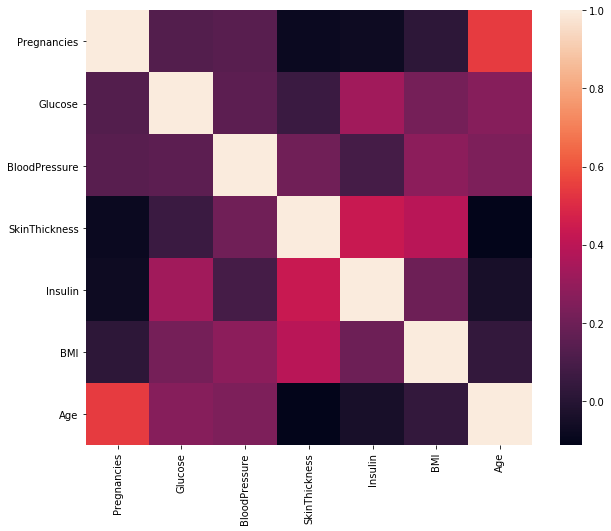

In [74]:
cormat = x.corr()
plt.figure(figsize = (10,8))
sns.heatmap(cormat)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
x_tr,x_tst,y_tr,y_tst = x_train,x_test,y_train,y_test
x_train.shape,y_train.shape

((614, 7), (614,))

In [76]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Age'],
      dtype='object')

In [77]:
# from imblearn.combine import SMOTEENN
# sm=SMOTEENN()
# x_upsampled,y_upsampled=sm.fit_resample(x,y)
# x_train,x_test,y_train,y_test = train_test_split(x_upsampled,y_upsampled,test_size=0.2)
# x_train.shape,x_test.shape,y_train.shape,y_test.shape

In [78]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
603,7,150,78,29,126,35.2,54
118,4,97,60,23,0,28.2,22
247,0,165,90,33,680,52.3,23
157,1,109,56,21,135,25.2,23
468,8,120,0,0,0,30.0,38
...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,63
192,7,159,66,0,0,30.4,36
629,4,94,65,22,0,24.7,21
559,11,85,74,0,0,30.1,35


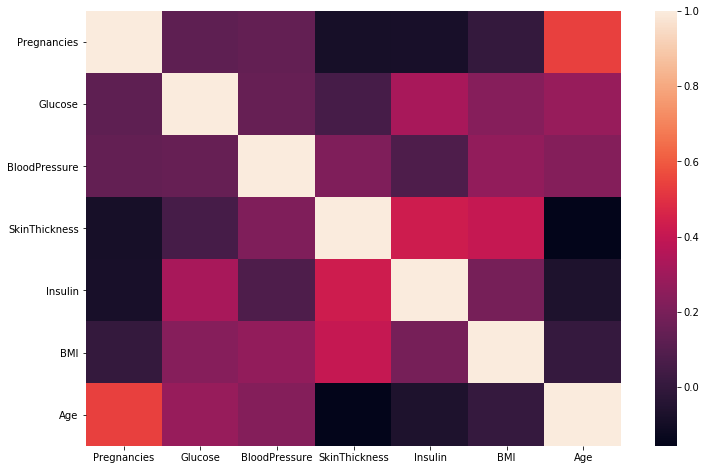

In [79]:
cormat = x_train.corr()
plt.figure(figsize = (12,8))
sns.heatmap(cormat)

In [80]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [81]:
#Build ML model and compare the performance of the selected feature

def randomForest(x_train,x_test,y_train,y_test):
    model = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print("Accuracy(Testing Data) : ")
    print(accuracy_score(y_test,y_pred))
    print('Accuracy#',np.mean(y_pred == y_test)*100)

    return model

In [82]:

# %%time
model = randomForest(x_train,x_test,y_train,y_test)

Accuracy(Testing Data) : 
0.8051948051948052
Accuracy# 80.51948051948052


In [83]:
# type(x_test.iloc[2])

In [84]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
tmp = np.array([0,180,76,53,10,53,0]).reshape(1,-1)

In [86]:
# tmp = {"Pregnancies":0.0,
# "Glucose":180.0,
# "BloodPressure":76.0,
# "SkinThickness": 53.0,
# "Insulin": 10.0,
# "BMI": 53.0,
# "Age": 25.0,}

# tmp,type(tmp)

In [87]:
model.predict(tmp)

array([1])

In [88]:
min(x_train[:,6:7]),max(x_train[:,6:7])

(array([21.]), array([81.]))